# Calories Burn Prediction

## Step 1: Import the libraries

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pickle

## Step 2: Load the data

In [6]:
data = pd.read_csv("data/calories.csv")

In [7]:
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [10]:
data.shape

(15000, 9)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [9]:
data.isna().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [11]:
data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [13]:
data.duplicated().any()

np.False_

In [30]:
data['Gender'].value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

## Step 3: Data Visualization

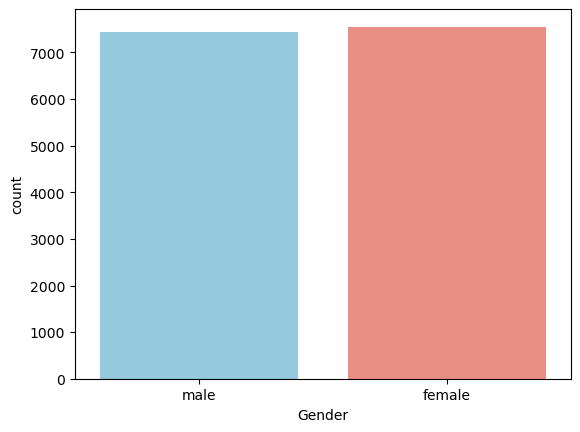

In [29]:
sns.countplot(data=data, x='Gender', hue='Gender', palette=['skyblue', 'salmon'], legend=False)
plt.show()

### lets check the distribution of age column

<Axes: xlabel='Age', ylabel='Count'>

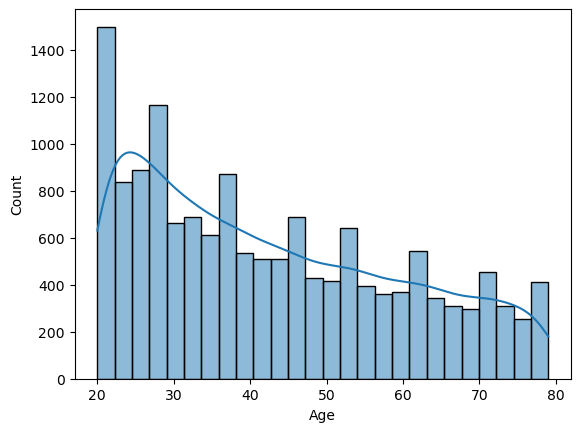

In [45]:
sns.histplot(data, x='Age', kde=True)

### Do same with Hight column as well

<Axes: xlabel='Height', ylabel='Density'>

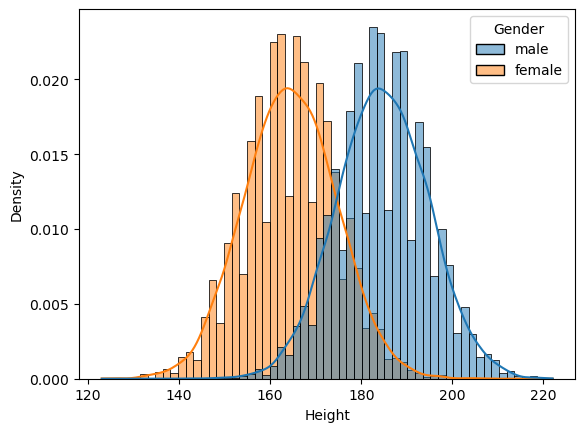

In [49]:
sns.histplot(data, x='Height', hue = 'Gender', kde=True, stat="density")

<Axes: xlabel='Weight', ylabel='Density'>

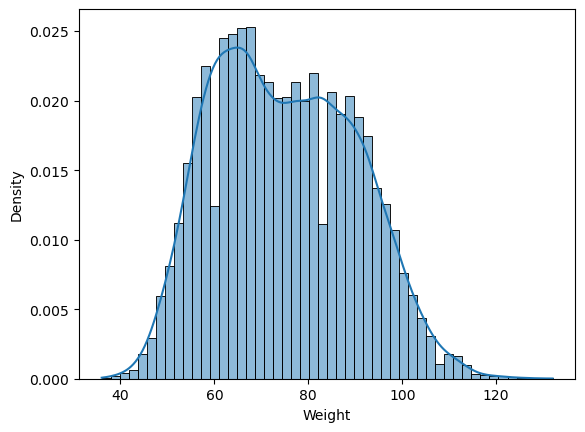

In [50]:
sns.histplot(data, x='Weight', kde=True, stat="density",)

In [55]:
numerical_data = data.drop(['Gender'], axis=1)
correlation = numerical_data.corr()
correlation

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
User_ID,1.000000,-0.001827,-0.013520,-0.011603,-0.002751,-0.000457,0.000923,-0.001661
Age,-0.001827,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,-0.013520,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,-0.011603,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,-0.002751,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,-0.000457,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.000923,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,-0.001661,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


<Axes: >

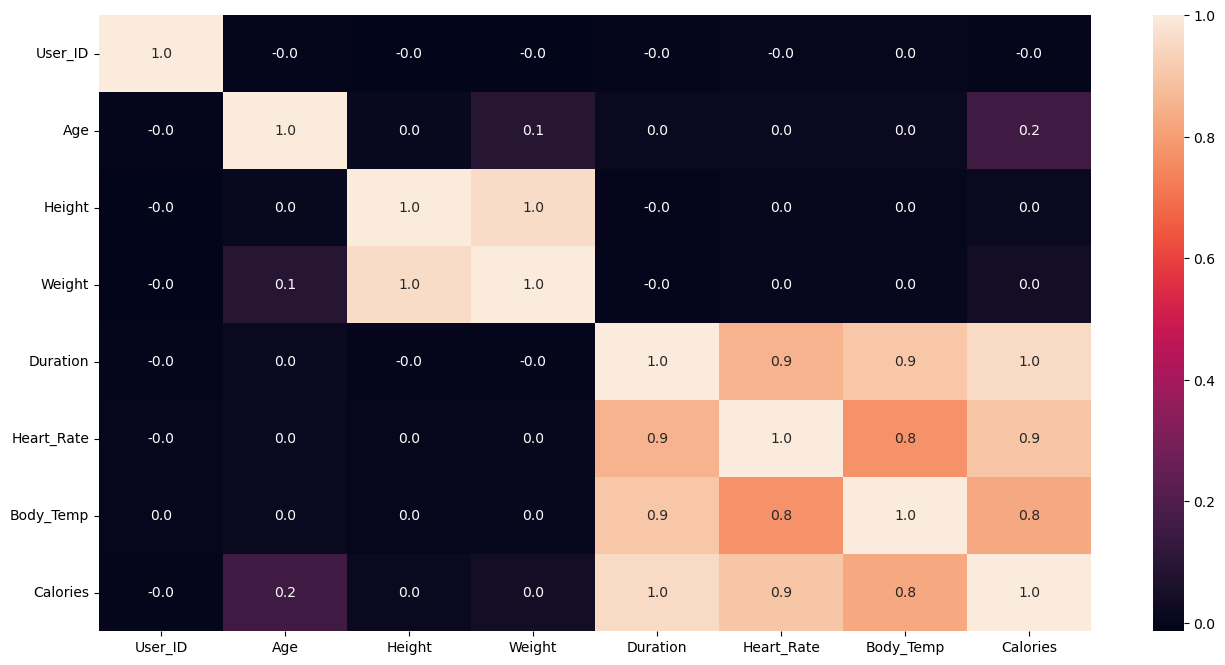

In [60]:
plt.figure(figsize=(16,8))
sns.heatmap(correlation, annot=True, fmt=".1f")

we can see duration, heart_rate, body_temp are highly correlated with **calories**

## Step 4: split the dataset

In [63]:
X = data.drop(columns= ['User_ID', 'Calories'])
y = data.Calories

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42)

In [66]:
data.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

In [67]:
preprocessor = ColumnTransformer(transformers =[
    ('ordinal', OrdinalEncoder(), ['Gender']),
    ('num', StandardScaler(), ['Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp'])
], remainder='passthrough')

In [70]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor())
])

In [71]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal', OrdinalEncoder(),
                                                  ['Gender']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [72]:
# make the prediction
y_pred = pipeline.predict(X_test)

In [73]:
r2_score(y_test, y_pred)

0.9988678909361673

In [74]:
mean_absolute_error(y_test, y_pred)

1.4981198125282924

### check accuracy using cross-valiadtion

In [76]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv = cross_val_score(pipeline, X, y, cv=kfold, scoring='r2')
cv.mean()

np.float64(0.9988510864545181)

## Save the model for future prediction

In [79]:
with open('data/model_pipeline.pkl', 'wb') as file:
    pickle.dump(pipeline, file)